In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import keras
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]

train_path = '../Dataset/Arctic_Classification_CNN_Data/Data/train/'
test_path = '../Dataset/Arctic_Classification_CNN_Data/Data/test/'
valid_path = '../Dataset/Arctic_Classification_CNN_Data/Data/val/'

inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [3]:
for layer in inception.layers:
    layer.trainable = False
    
folders = glob('../Dataset/Arctic_Classification_CNN_Data/Data/train/*')

In [4]:
folders

['../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Fox',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Hare',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Skua',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Tern',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Wolf',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Arctic Woolly Bear Moth',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Bald Eagle',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Bearded Seal',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Beluga Whale',
 "../Dataset/Arctic_Classification_CNN_Data/Data/train\\Brunnich's Guillemots",
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Canada Goose',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Caribou',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Dall Sheep',
 '../Dataset/Arctic_Classification_CNN_Data/Data/train\\Ermine',
 '../Da

In [5]:
len(folders)

34

In [6]:
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('../Dataset/Arctic_Classification_CNN_Data/Data/train/',
                                                target_size = (224, 224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 2238 images belonging to 34 classes.


In [13]:
validation_set = valid_datagen.flow_from_directory('../Dataset/Arctic_Classification_CNN_Data/Data/val/',
                                                  target_size = (224, 224),
                                                  batch_size = 16,
                                                  class_mode = 'categorical')

Found 626 images belonging to 34 classes.


In [14]:
test_set = test_datagen.flow_from_directory('../Dataset/Arctic_Classification_CNN_Data/Data/test/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 349 images belonging to 34 classes.


In [15]:
r = model.fit_generator(
    training_set,
    validation_data=validation_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\arghy\AppData\Local\Temp\ipykernel_8976\960267324.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
127/140 [==========================>...] - ETA: 17s - loss: 10.1557 - accuracy: 0.5596

C:\Users\arghy\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


140/140 [==============================] - 227s 2s/step - loss: 9.5428 - accuracy: 0.5845 - val_loss: 6.9358 - val_accuracy: 0.6903
Epoch 2/10
140/140 [==============================] - 198s 1s/step - loss: 3.9369 - accuracy: 0.7962 - val_loss: 7.4500 - val_accuracy: 0.7045
Epoch 3/10
140/140 [==============================] - 222s 2s/step - loss: 2.8006 - accuracy: 0.8472 - val_loss: 6.3165 - val_accuracy: 0.7642
Epoch 4/10
140/140 [==============================] - 214s 2s/step - loss: 2.9514 - accuracy: 0.8570 - val_loss: 5.7609 - val_accuracy: 0.7812
Epoch 5/10
140/140 [==============================] - 255s 2s/step - loss: 1.6989 - accuracy: 0.9044 - val_loss: 6.6988 - val_accuracy: 0.7784
Epoch 6/10
140/140 [==============================] - 250s 2s/step - loss: 1.4519 - accuracy: 0.9231 - val_loss: 7.5375 - val_accuracy: 0.7614
Epoch 7/10
140/140 [==============================] - 260s 2s/step - loss: 1.5395 - accuracy: 0.9330 - val_loss: 7.4599 - val_accuracy: 0.7756
Epoch 8/10

In [16]:
from tensorflow.keras.models import load_model

model.save('arctic_animal_classification.h5')

In [17]:
from keras.utils import load_img, img_to_array

In [18]:
y_pred = model.predict(test_set)

22/22 [==============================] - 31s 1s/step


In [19]:
y_pred

array([[0.000000e+00, 5.886031e-32, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([29, 12, 19, 18,  5,  6, 27,  5,  2,  2, 29, 16, 13,  1, 23, 28, 24,
        3,  3,  3, 19,  1, 33, 25, 26, 32, 16, 12, 32, 20,  4, 31, 31, 25,
        1, 33, 27, 21, 11, 33,  0,  2,  8, 16, 23, 31,  7, 31, 31,  8,  0,
       30, 13, 31,  5,  5,  7, 18,  6,  4, 18,  6, 18,  1, 28, 11, 23, 21,
       23,  0,  1, 13,  0, 24, 12, 29, 11, 20, 17, 32, 13, 24, 18,  5, 18,
        9, 16, 14, 19,  3,  2,  6, 11, 28, 30, 26,  2,  4, 10, 15, 17,  2,
       16, 10,  2, 32, 16, 20, 28, 33, 12, 30, 26,  8, 22,  6, 28, 18, 11,
       21, 28, 18,  4, 33, 20, 31, 19, 11, 14, 22, 21, 15,  2, 24,  3,  5,
       24, 25, 17, 14, 31, 18, 29, 15,  6, 21, 24, 19, 33, 32, 17, 15, 20,
       20, 27, 26, 20, 23,  9, 25,  7,  8, 17, 30, 12, 13,  1, 13, 16,  8,
       26,  6, 31,  0, 11, 28, 16, 27,  4,  5, 30,  8, 18, 32, 28, 32,  4,
       18, 27, 30,  0, 14, 17,  9, 13, 21, 27, 26, 30, 13, 13,  4, 15, 30,
       30, 10, 12,  6, 21,  5, 24, 26, 27, 12, 10, 32,  3,  4, 33,  0, 10,
        5,  9, 31, 13,  8

In [22]:
generator= train_datagen.flow_from_directory("../Dataset/Arctic_Classification_CNN_Data/Data/train/", batch_size=16)
label_map = (generator.class_indices)
label_map

Found 2238 images belonging to 34 classes.


{'Arctic Fox': 0,
 'Arctic Hare': 1,
 'Arctic Skua': 2,
 'Arctic Tern': 3,
 'Arctic Wolf': 4,
 'Arctic Woolly Bear Moth': 5,
 'Bald Eagle': 6,
 'Bearded Seal': 7,
 'Beluga Whale': 8,
 "Brunnich's Guillemots": 9,
 'Canada Goose': 10,
 'Caribou': 11,
 'Dall Sheep': 12,
 'Ermine': 13,
 'Greenland Shark': 14,
 'Harp Seal': 15,
 'Hooded Seal': 16,
 'Lemming': 17,
 'Moose': 18,
 'Musk Ox': 19,
 'Narwhal': 20,
 'Orca': 21,
 'Polar Bear': 22,
 'Ptarmigan': 23,
 'Puffin': 24,
 'Ribbon Seal': 25,
 'Ringed Seal': 26,
 'Sea Otter': 27,
 'Snow Goose': 28,
 'Snowshoe Hare': 29,
 'Snowy Owl': 30,
 'Spotted Seal': 31,
 'Walrus': 32,
 'Wolverine': 33}

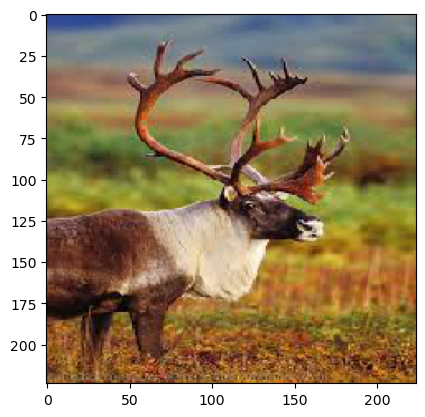

In [24]:
img = load_img('../Dataset/Arctic_Classification_CNN_Data/Data/test/Arctic Wolf/', target_size=(224, 224))
x = img_to_array(img)

x = x* 1.0/255.0

x = np.expand_dims(x, axis=0)

plt.figure()
plt.imshow(img)
plt.show()

In [26]:
test_image_pred2 = model.predict(x)
test_image_pred2 = np.argmax(test_image_pred2, axis=1)
test_image_pred2

1/1 [==============================] - 0s 131ms/step


array([11], dtype=int64)